***
## [January 2019] - Comparing higher order purity for horizontal vs vertical polarization
### Abstract:

We saw previously (undu scan 21_09_2018.pxp) that vertical polarization (phase 42) seems to dump a large 3rd order component into the beam center, such that we won't be able to get rid of it by just closing down the acceptance.

Since then we have improved the alignment a bit, so let's check again.

FE mask set for 3.5x3.5mm aperture

Mono baffles set for 0.86sigma (hgap 4.8, vgap 5.3)

This is measuring on the mesh! Note that this will probably make the 3rd order component smaller anyway, when compared to the last dataset measured with the diode. If there's time I'll measure with both and compare.

Exit slit 1000x1000, M1 feedback running.

In [1]:
from BLOCH_beamline import *
data_folder = Path('Data/')
%matplotlib inline
font = {'size'   : 14}
matplotlib.rc('font', **font)

---- BLOCH beamline ----
	Last updated 02.12.2018 

	Latest change: M1 pitch lookup



In [8]:
hpol = HDF5loadscan(data_folder/"19.01.21.higherOrder_tests.h5",99)
hpol['meshCurrent'] = [((ii)/1000) for ii in hpol['b110a_ctl_em02_ch01']]

vpol = HDF5loadscan(data_folder/"19.01.21.higherOrder_tests.h5",100)
vpol['meshCurrent'] = [((ii)/1000) for ii in vpol['b110a_ctl_em02_ch01']]

vpol2 = HDF5loadscan(data_folder/"19.01.21.higherOrder_tests.h5",101)
vpol2['meshCurrent'] = [((ii)/1000) for ii in vpol2['b110a_ctl_em02_ch01']]

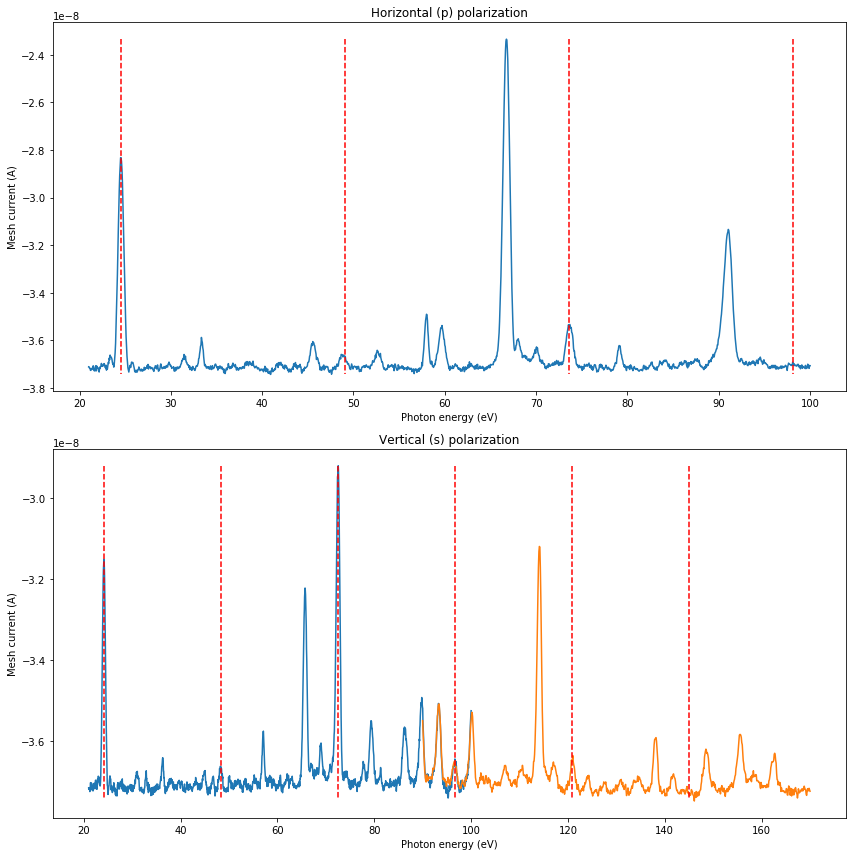

In [10]:
%matplotlib inline
fig=plt.figure(figsize=(12,12))

plt.subplot(211)
plt.plot(hpol['mono_energy'],hpol['meshCurrent'])
fundamental=24.52
plotmax=np.array(hpol['meshCurrent']).max()
plotmin=np.array(hpol['meshCurrent']).min()
for order in range(1,5):
    plt.plot([fundamental*order,fundamental*order],[plotmax,plotmin],'r--')
plt.title("Horizontal (p) polarization")
plt.xlabel("Photon energy (eV)")
plt.ylabel("Mesh current (A)")


plt.subplot(212)

plt.plot(vpol['mono_energy'],vpol['meshCurrent'])
plt.plot(vpol2['mono_energy'],vpol2['meshCurrent'])
fundamental=24.15
plotmax=np.array(vpol['meshCurrent']).max()
plotmin=np.array(vpol['meshCurrent']).min()
for order in range(1,7):
    plt.plot([fundamental*order,fundamental*order],[plotmax,plotmin],'r--')
plt.title("Vertical (s) polarization")
plt.xlabel("Photon energy (eV)")
plt.ylabel("Mesh current (A)")
plt.tight_layout()

plt.show()